# More molecular dynamics coding practice


#### <p style="text-align: right;"> &#9989; **put your name here** </p>

---
**This homework assignment is due on 10/2.**

This simulation is very similar to Coding Lab 1, but now it has closed boundary conditions on the four walls, instead of periodic boundary conditions. 

### Part 1. A closed system

You can follow the procedures below to complete your code.

1. When an atom hits a wall, it bounces back. So, using Euler method and west wall as example, the atoms’ x position will be updated using the rule

$ x_i(t+\Delta t) = x_i(t) + v_i(t) \Delta t$

$\text{if}~~x_i(t+\Delta t) > 0,~~x_i(t+\Delta t) = 0 - x_i(t+\Delta t).$

See the figure for illustation.

<div align="left">
<img src="https://i.ibb.co/5g8DnTV6/close-BC-1.jpg" width="300">
</div>

You should be able to figure out the bounce-back conditions needed for the other 3 walls. 

2. since there is no periodic boundary condition, we no longer need to consider the imaging atoms in the periodically repeated cells when calculating inter-atom distances. 
3. Let’s assume that the atoms interacting with walls can also be described by Lennard-Jones Potential, but with a smaller interaction strength ($\epsilon_W = 0.1$). The LJ potential will be a function of the distance between the atom and wall. Note that we decrease the cutoff radius to $2.5\times r_m$ in this work for convenience.


**Set up simulation conditions**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time  
import random

# Material parameters
ma = 0.5       # Mass
rm = 0.1       # Reference radius
r0 = 1.2246*rm
eps = 0.25     # Strength
epsW = 0.1

# Simulation parameters
nstep = 100001   # Number of steps
dt = 0.00005    # Time step size
N = 64         # Number of atoms

# Domain size
Lx = 1.0        # Domain size in x direction
Ly = 1.0        # Domain size in y direction
r_cut = 2.5 * rm  # Cutoff radius

**Set up arrays to store data**

In addition to the previous in-class Lab assignment, now we need to calculate the inter-atom-wall force of each atom. 

* Thus, we shall create a distance to wall array `dst2w` for atoms, which should be a Nx2 array: rows indicate atoms and columns for the $x$ and $y$ distance to the wall.

* We also need to store the atom-wall force of each atom. So, it, `Fi_w`, will be a Nx2 array.


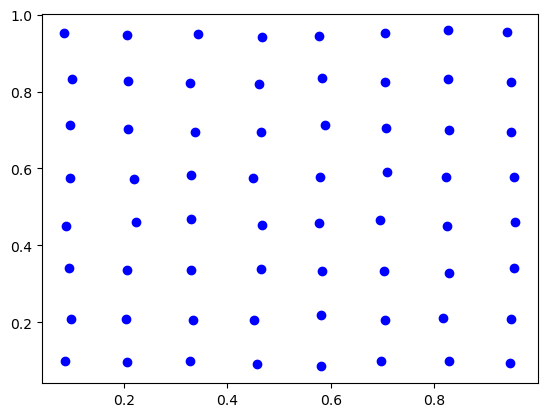

In [10]:
# fill ?? to complete the code


# Initializing arrays
Pos = np.zeros((N, 2))    # Position array (N x 2)
Vel = np.zeros((N, 2))    # Velocity array (N x 2)
Acc = np.zeros((N, 2))    # Acceleration array (N x 2)
dst = np.zeros((N, N, 3))   # Inter-atom distance matrix (N x N)

Fij = np.zeros((N, N,2))  # Interatomic forces (N x N x 2)
Fi_v = np.zeros((N,2))        # Total force  (N x 2)


dst2w = ??
Fi_w = ??  

# create position, velocity, and acceleration arrays
Pos = np.zeros((N,2))
Vel = np.random.rand(N, 2)  # <-- random initial velocity
Vel *= 0.001 
Acc = np.random.rand(N, 2)  # <-- random initial acceleration 
Acc *= 0.0001 

# set up initial atom positions. Let's make a 8x8 configuration
for i in range(8):           # <-- note that default Python loop goes from 0 to n-1
    for j in range(8):       # <-- note indent is what Python recognizes nest loop
        Pos[i*8+j,0] = j*r0 + 0.75*r0 + random.uniform(-0.01, 0.01) # <-- add some randomness
        Pos[i*8+j,1] = i*r0 + 0.75*r0 + random.uniform(-0.01, 0.01)

# for i in range(1, N + 1):
#     rr = np.floor(i / 9)
#     cl = i % 9

#     Pos[i - 1, 0] = 0.1 + (cl - 1) * 0.1122 + 0.015
#     Pos[i - 1, 1] = 0.1 + rr * 0.1122 + 0.015

    
# save the initial atomic positions
Pos_pr = Pos.copy()
Vel_pr = Vel.copy()
Acc_pr = Acc.copy()

plt.scatter(Pos[:, 0], Pos[:, 1], c='b') 

---
In this code,

* Remove periodic conditons and replace the conditions with a closed system when calculating the interatomic distances and interatomic forces.
* Calculate all interatomic forces and get the total force on each atom imposed by all neighbor atoms within the cutoff radius.
* The new portion: calculate the force of each atom imposed by the vertical wall (the force in the $x$ direction). Assuming only the nearest one should be included. Similarly, calculate the force imposed by the horizontal wall (force in the $y$ direction). Only consider the nearest one. See the figure below for illustration.

<div align="left">
<img src="https://i.ibb.co/H6Kc0nH/wall-force-1.jpg" width="480">
</div>
  
* For each atom, the total force will combine the interatomic and atom-wall forces together.
* Calculate the acceleration and update atom positions as in the in-class assignment.
* For simplicity, we can use Euler method although it's less accurate than Verlet.  If you want to use Verlet method, please feel free to do so.
  

In [ ]:

# FILL ?? TO COMPLETE THE CODE

# Initialization
tm = 0
cnt = 1


# Initialization before the loop
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, Lx)
ax.set_ylim(0, 1)

Pos = Pos_pr.copy()
Vel = Vel_pr.copy()
Acc = Acc_pr.copy()

# for iter in range(1, Nstp * 2 + 1):
for it in range(nstep+1):    

    
    # wall boundary conditions
    for at in range(N):
        # in x direction
        if Pos[at,0] < 0:
            Pos[at,0] = 0 - Pos[at,0]
        if Pos[at,0] > Lx:
            Pos[at,0] = ??

        # in y direction
        if Pos[at,1] < 0:
            Pos[at,1] = ??
        if Pos[at,1] > Ly:
            Pos[at,1] = ?? 

    # Calculate inter-atom distances without periodic boundaries
    for at in range(N - 1):
        for ne in range(at + 1, N):
            dx_c = Pos[ne,0] - Pos[at,0]
            dy_c = Pos[ne,1] - Pos[at,1]

            # X component
            dst[at,ne,0] = ??
            dst[ne,at,0] = -dst[at,ne,0]

            # Y component
            dst[at,ne,1] = ??
            dst[ne,at,1] = -dst[at,ne,1]

            # Inter-atom distance
            dst[at,ne,2] = np.sqrt(dst[at,ne,0] ** 2 + dst[at,ne,1] ** 2)
            dst[ne,at,2] = dst[at,ne,2] 
            
    
    # Calculate force
    Fij.fill(0)

    for at in range(N - 1):
        for ne in range(at + 1, N):
            if 0 < dst[at,ne,2] < r_cut:
                dUdr = 24 * (eps/rm) * (2*(rm/dst[at,ne,2])**13 - (rm/dst[at,ne,2])**7)
 
                Fij[at,ne,0] = -dst[at,ne,0] / dst[at,ne,2] * dUdr
                Fij[at,ne,1] = -dst[at,ne,1] / dst[at,ne,2] * dUdr

                Fij[ne,at,0] = -Fij[at,ne,0]
                Fij[ne,at,1] = -Fij[at,ne,1]

    # Calculate total force of each atom
    for at in range(N):
        Fi_v[at,0] = np.sum(Fij[at,:,0],axis=0)
        Fi_v[at,1] = np.sum(Fij[at,:,1],axis=0)
            

    # Calculate inter-atom-wall distances 
    for at in range(N):
        dx_ww = 0.0 - Pos[at,0]
        dx_ew = Lx - Pos[at,0]
        dst2w[at,0] = ??

        dy_sw = 0.0 - Pos[at,1]
        dy_nw = Ly - Pos[at,1]
        dst2w[at,1] = ??


    # Calculate inter-atom-wall forces
    for at in range(N):
        if 0 < dst2w[at,2] < r_cut:
            Fi_w[at,0] = -?? / ?? * 24 * (??/rm) * (2*(rm/??)**13 - (rm/??)**7) 
            Fi_w[at,1] = -?? / ?? * 24 * (??/rm) * (2*(rm/??)**13 - (rm/??)**7)  

    # Combine total interatomic force and inter-atomic-wall force
    for at in range(N):
        Fi_v[at,0] += Fi_w[at,0]
        Fi_v[at,1] += Fi_w[at,1]

    # calculate acceleration of each atom
    # Acc = Fi_v/ma
    for at in range(N): 
        Acc[at,0] = Fi_v[at,0]/ma
        Acc[at,1] = Fi_v[at,1]/ma          


    # Update positions
    for at in range(N): 
        Pos[at,0] += Vel[at,0] * dt
        Pos[at,1] += Vel[at,1] * dt

    
    # Update velocity
    for at in range(N): 
        Vel[at, 0] += Acc[at, 0] * dt
        Vel[at, 1] += Acc[at, 1] * dt


        
    
    # Visualization
    if it % 50 == 1:
        plt.plot(Pos[:, 0], Pos[:, 1], 'bo')
        plt.axis([0, Lx, 0, Ly])
        print(it)

   
        # Animaiton part (dosn't change)
        clear_output(wait=True) # Clear output for dynamic display
        display(fig)            # Reset display
        fig.clear()             # Prevent overlapping and layered plots
        time.sleep(0.0002)         # Sleep for half a second to slow down the animationtm = 0



---
## Part 2

In this section, we add one more condition to mimic a piston pressure. Copy the functioning code above to the code cell.

* The ceiling will drop down gradually and then slowly move up , i.e., $L_y$ decreases and then increases during the simulation.
* Let's set the ceiling moves 1/50000 per iteration step. Ly decreases during the first 20000 steps and then Ly increases.
* The total number of time steps is 40001.
* We can add a bold line to indicate the ceiling by including a line like `plt.plot([0, Lx], [Ly, Ly], 'k-', linewidth=5)` in the plotting section.

In [ ]:
# put your code here.





&#9989; Do This --  Describe what you observed in the simulation in this Markdown cell. 

&#9989; Do This -- Finally, if you use any AI, please indicate which one and comment on your experiences.


--- 
### Great! You're done! Please add your name to the file name and upload your file to the respective drop box. This assignment is due on 10/2. 
